<a href="https://colab.research.google.com/github/Omernovich/xray-and-non-xray/blob/main/x_ray_and_non_x_ray_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [3]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test'    # Update with your actual path

In [4]:
import os
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train/xray')))

500
500
500
489


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 792 images belonging to 2 classes.
Found 197 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 183s 7s/step - accuracy: 0.6897 - loss: 0.8186 - val_accuracy: 0.9746 - val_loss: 0.1255
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.9898 - loss: 0.0302 - val_accuracy: 0.9188 - val_loss: 0.4704
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.9930 - loss: 0.0362 - val_accuracy: 0.9391 - val_loss: 0.1680
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.8985 - val_loss: 0.6208
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.9970 - loss: 0.0122 - val_accuracy: 0.8629 - val_loss: 0.5880
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.9945 - loss: 0.0117 - val_accuracy: 0.9898 - val_loss: 0.0460
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.9958 - loss: 0.0061 - val_accuracy: 0.9797 - val_loss: 0.0862
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 1.0000 - loss: 3.6468e-04 - val_accurac

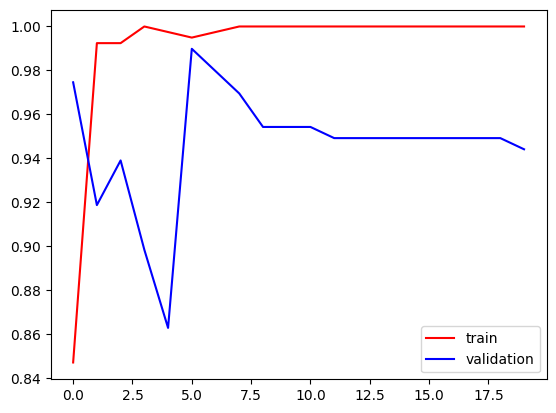

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

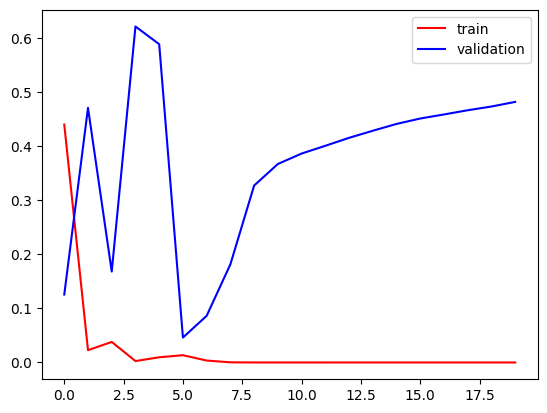

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [13]:
#predict the test data
predictions = model.predict(test_data)


32/32 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[240 260]
 [249 251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49       500
           1       0.49      0.50      0.50       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [15]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 396ms/step - accuracy: 0.8555 - loss: 1.8119 - val_accuracy: 0.7614 - val_loss: 2.5795
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - accuracy: 0.9775 - loss: 0.6046 - val_accuracy: 0.9188 - val_loss: 1.8269
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.9933 - loss: 0.3108 - val_accuracy: 0.8223 - val_loss: 9.1805
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.9940 - loss: 0.3022 - val_accuracy: 0.8528 - val_loss: 4.3653
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.9965 - loss: 0.1408 - val_accuracy: 0.7107 - val_loss: 22.4398
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.9937 - loss: 0.2239 - val_accuracy: 0.8477 - val_loss: 8.9265
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.9993 - loss: 0.0486 - val_accuracy: 0.5076 - val_loss: 34.2072
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 492ms/step - accuracy: 0.9980 - loss: 0.0329 - val_accurac

In [18]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [19]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[420  80]
 [424  76]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.84      0.62       500
           1       0.49      0.15      0.23       500

    accuracy                           0.50      1000
   macro avg       0.49      0.50      0.43      1000
weighted avg       0.49      0.50      0.43      1000



Using Pre-trained model - Resnet

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 807ms/step - accuracy: 0.5468 - loss: 1.7375 - val_accuracy: 0.6650 - val_loss: 0.6655
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.7047 - loss: 0.5790 - val_accuracy: 0.8274 - val_loss: 0.3957
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.8987 - loss: 0.2689 - val_accuracy: 0.7513 - val_loss: 0.4660
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.9083 - loss: 0.2689 - val_accuracy: 0.8782 - val_loss: 0.3072
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.9392 - loss: 0.2096 - val_accuracy: 0.8426 - val_loss: 0.3577
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.9072 - loss: 0.2476 - val_accuracy: 0.6193 - val_loss: 0.9032
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.7892 - loss: 0.4055 - val_accuracy: 0.7817 - val_loss: 0.4448
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.9319 - loss: 0.1830 - val_accuracy: 

In [24]:
predictions = resnet_model.predict(test_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 342ms/step


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[199 301]
 [225 275]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.47      0.40      0.43       500
           1       0.48      0.55      0.51       500

    accuracy                           0.47      1000
   macro avg       0.47      0.47      0.47      1000
weighted avg       0.47      0.47      0.47      1000

